In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hussameldinanwer/mimic-iii")

print("Path to dataset files:", path)

100%|██████████| 100M/100M [00:03<00:00, 30.9MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hussameldinanwer/mimic-iii/versions/1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv(f"{path}/PRESCRIPTIONS.csv")

<ipython-input-3-214f219d9068>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/PRESCRIPTIONS.csv")


In [4]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156450 entries, 0 to 4156449
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ROW_ID             int64  
 1   SUBJECT_ID         int64  
 2   HADM_ID            int64  
 3   ICUSTAY_ID         float64
 4   STARTDATE          object 
 5   ENDDATE            object 
 6   DRUG_TYPE          object 
 7   DRUG               object 
 8   DRUG_NAME_POE      object 
 9   DRUG_NAME_GENERIC  object 
 10  FORMULARY_DRUG_CD  object 
 11  GSN                object 
 12  NDC                float64
 13  PROD_STRENGTH      object 
 14  DOSE_VAL_RX        object 
 15  DOSE_UNIT_RX       object 
 16  FORM_VAL_DISP      object 
 17  FORM_UNIT_DISP     object 
 18  ROUTE              object 
dtypes: float64(2), int64(3), object(14)
memory usage: 602.5+ MB


In [7]:
df = df.dropna(subset=['DOSE_VAL_RX', 'DRUG'])

In [8]:
df['DOSE_VAL_RX'] = pd.to_numeric(df['DOSE_VAL_RX'], errors='coerce')
df = df.dropna(subset=['DOSE_VAL_RX'])  # Drop rows where conversion failed

<ipython-input-8-907b5317451a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOSE_VAL_RX'] = pd.to_numeric(df['DOSE_VAL_RX'], errors='coerce')


In [9]:
# Summary statistics for dosage values
print("\nSummary Statistics for Dosage Values:")
print(df['DOSE_VAL_RX'].describe())


Summary Statistics for Dosage Values:
count    3.879116e+06
mean     3.087770e+02
std      5.235360e+04
min     -1.000000e+03
25%      4.000000e+00
50%      4.000000e+01
75%      2.000000e+02
max      1.000000e+08
Name: DOSE_VAL_RX, dtype: float64


In [10]:
# Skewness and Kurtosis
print(f"Skewness: {df['DOSE_VAL_RX'].skew():.2f}")
print(f"Kurtosis: {df['DOSE_VAL_RX'].kurtosis():.2f}")

Skewness: 1824.56
Kurtosis: 3444840.64


In [11]:
# Top 10 most prescribed drugs
top_drugs = df['DRUG'].value_counts().head(10)
print("\nTop 10 Most Prescribed Drugs:\n", top_drugs)


Top 10 Most Prescribed Drugs:
 DRUG
Potassium Chloride             186285
Insulin                        143440
D5W                            142205
Furosemide                     133086
NS                             129587
0.9% Sodium Chloride           128473
Iso-Osmotic Dextrose            87004
Sodium Chloride 0.9%  Flush     83386
Magnesium Sulfate               83109
5% Dextrose                     73776
Name: count, dtype: int64


<ipython-input-12-fced5f8061b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='viridis')


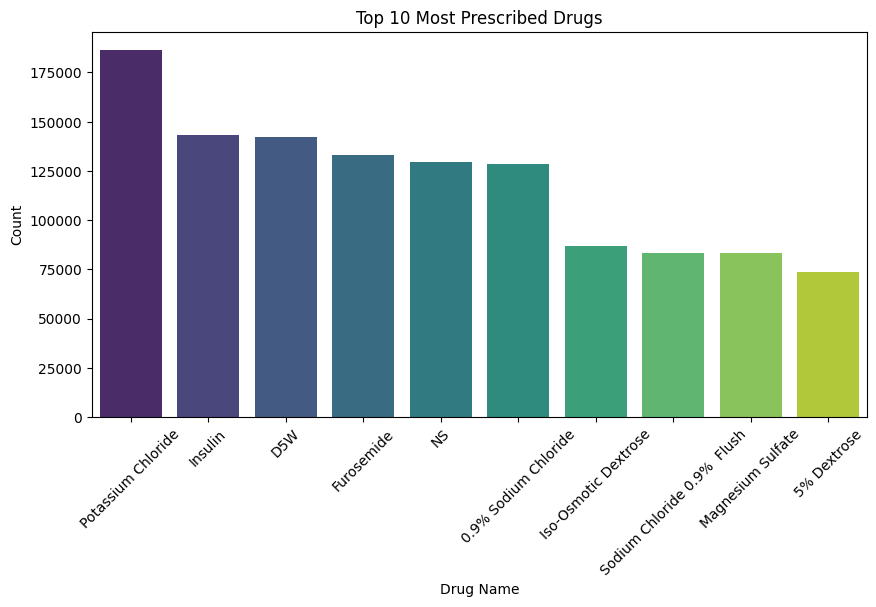

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Most Prescribed Drugs")
plt.ylabel("Count")
plt.xlabel("Drug Name")
plt.show()


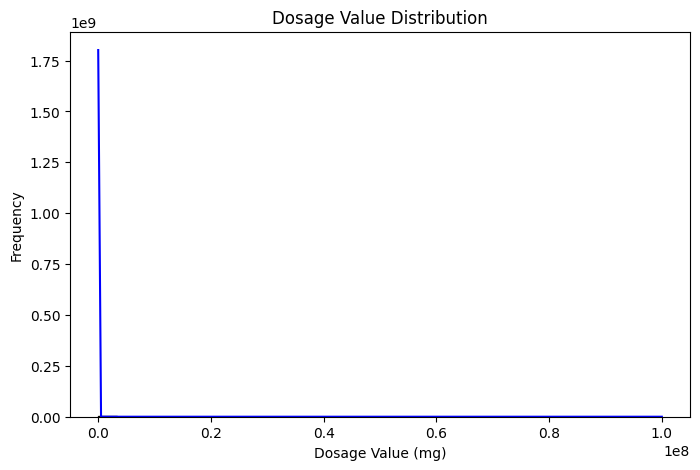

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['DOSE_VAL_RX'], kde=True, color='blue', bins=30)
plt.title("Dosage Value Distribution")
plt.xlabel("Dosage Value (mg)")
plt.ylabel("Frequency")
plt.show()

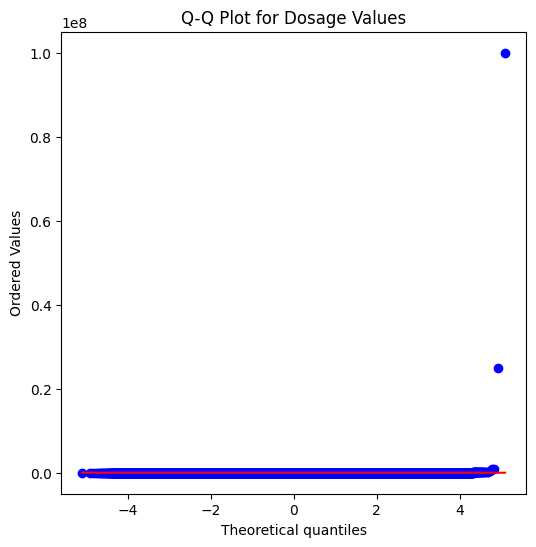

In [14]:
plt.figure(figsize=(6, 6))
stats.probplot(df['DOSE_VAL_RX'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Dosage Values")
plt.show()

In [15]:
shapiro_test = stats.shapiro(df['DOSE_VAL_RX'].sample(500))  # Shapiro test (using sample if large dataset)
ks_test = stats.kstest(df['DOSE_VAL_RX'], 'norm', args=(df['DOSE_VAL_RX'].mean(), df['DOSE_VAL_RX'].std()))
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")
print(f"Kolmogorov-Smirnov Test p-value: {ks_test.pvalue:.4f}")

Shapiro-Wilk Test p-value: 0.0000
Kolmogorov-Smirnov Test p-value: 0.0000


In [16]:
ci_lower, ci_upper = stats.norm.interval(0.95, loc=df['DOSE_VAL_RX'].mean(), scale=df['DOSE_VAL_RX'].std() / np.sqrt(len(df)))
print(f"95% Confidence Interval for Dosage: ({ci_lower:.2f}, {ci_upper:.2f})")


95% Confidence Interval for Dosage: (256.68, 360.88)


In [17]:
route_counts = df['ROUTE'].value_counts().head(10)
print("\nTop 10 Drug Administration Routes:\n", route_counts)


Top 10 Drug Administration Routes:
 ROUTE
IV         1875668
PO          919381
IV DRIP     320426
PO/NG       227491
SC          208604
IH           69643
IM           44726
PR           42217
NG           39379
TP           29122
Name: count, dtype: int64


<ipython-input-18-9b3723985e20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_counts.index, y=route_counts.values, palette='magma')


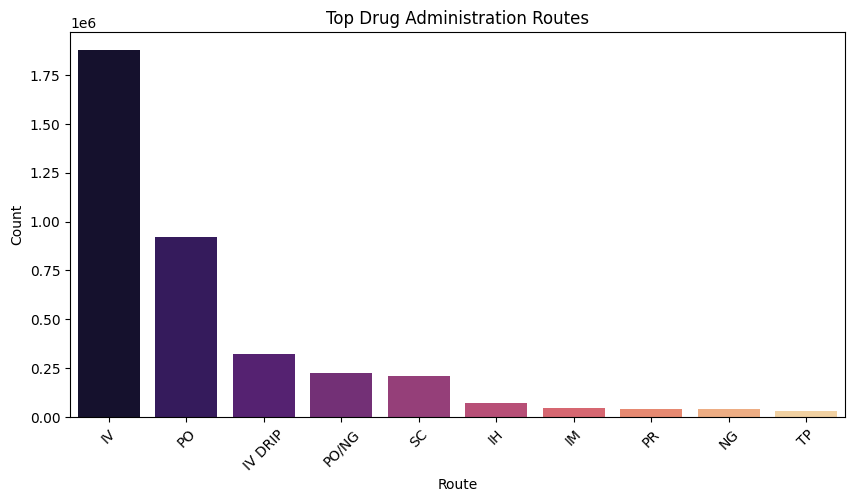

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=route_counts.index, y=route_counts.values, palette='magma')
plt.xticks(rotation=45)
plt.title("Top Drug Administration Routes")
plt.ylabel("Count")
plt.xlabel("Route")
plt.show()